<a href="https://colab.research.google.com/github/tmogoa/melamine/blob/main/MelamineClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2022-11-04 06:57:50--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6539 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py’

pytorchcv.py        100%[===================>]   6.39K  --.-KB/s    in 0s      

2022-11-04 06:57:50 (81.2 MB/s) - ‘pytorchcv.py’ saved [6539/6539]



In [2]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Convolutional Neural Networks**

# Cats vs Dogs

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
import os

from pytorchcv import train, plot_results, display_dataset, train_long, check_image_dir

In [4]:
check_image_dir('/content/drive/Shareddrives/Melamine/classf_ds/mel/*.*')
check_image_dir('/content/drive/Shareddrives/Melamine/classf_ds/nev/*.*')

# **Hyperparameters**

In [50]:
NUM_EPOCHS = 10
IMAGE_DIR = "/content/drive/Shareddrives/Melamine/classf_ds"
BATCH_SIZE= 32

In [29]:
data_s  = range(30)

Len: 1499


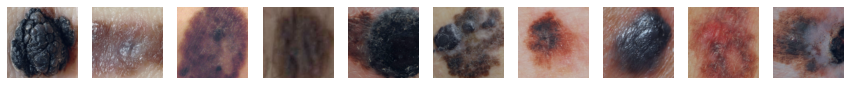

In [49]:
std_normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
trans = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        std_normalize
    ]
)
dataset = torchvision.datasets.ImageFolder(
    IMAGE_DIR, 
    transform=trans
)
trainset, testset = torch.utils.data.random_split(
    dataset,
    [
        int(0.8 * len(dataset)), 
        len(dataset) - int(0.8 * len(dataset))
    ],
    generator=torch.Generator().manual_seed(42)
)
print(f"Len: {len(dataset)}")
display_dataset(dataset)

# VGG!! HERE WE COME

In [60]:
vgg = torchvision.models.vgg16(pretrained=True)
sample_image = dataset[0][0].unsqueeze(0)# adds dimension on specified position
res = vgg(sample_image)
print(res[0].argmax())

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

tensor(116)


In [ ]:
summary(vgg, input_size=(1, 3, 224, 224))

In [62]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In addition to the layer we already know, there is also another layer type called Dropout. These layers act as regularization technique. Regularization makes slight modifications to the learning algorithm so the model generalizes better. During training, dropout layers discard some proportion (around 30%) of the neurons in the previous layer, and training happens without them. This helps to get the optimization process out of local minima, and to distribute decisive power between different neural paths, which improves overall stability of the network.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Doing computations on device = {}'.format(device))
vgg.to(device)
sample_image = sample_image.to(device)

vgg(sample_image).argmax()

Doing computations on device = cuda


tensor(282, device='cuda:0')

torch.Size([1, 512, 7, 7])


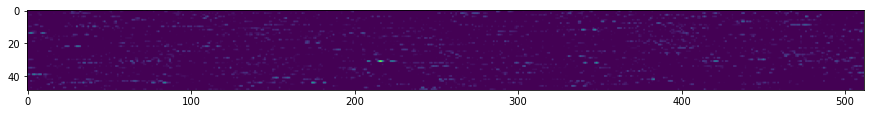

In [ ]:
res = vgg.features(sample_image).cpu()
plt.figure(figsize=(15, 3))
plt.imshow(res.detach().view(-1, 512))
print(res.size())

In [ ]:
bs = 8
dl = torch.utils.data.DataLoader(
    dataset,
    batch_size=bs,
    shuffle=True
)
num = bs * 100
feature_tensor = torch.zeros(num, 512*7*7).to(device)
label_tensor = torch.zeros(num).to(device)

i = 0
for x, l in dl:
    with torch.no_grad():
        f = vgg.features(x.to(device))
        feature_tensor[i:i+bs] = f.view(bs, -1)
        label_tensor[i:i+bs] = l
        i += bs
        print('.', end='')# 'end' defines lat char to be printed, we overwrite the newline
        if i >=num:
            break


In [ ]:
vgg_dataset = torch.utils.data.TensorDataset(
    feature_tensor,
    label_tensor.to(torch.long)# data-type conversion
)
train_ds, test_ds = torch.utils.data.random_split(
    vgg_dataset,
    [700, 100]
)

train_loader = torch.utils.data.DataLoader(
    train_ds,
    batch_size=32
)
test_loader = torch.utils.data.DataLoader(
    test_ds,
    batch_size=32
)

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(512*7*7, 2),
    torch.nn.LogSoftmax()
).to(device)

history = train(net, train_loader, test_loader)

In [ ]:
print(vgg)

In [ ]:
vgg.classifier = torch.nn.Linear(
    25088,
    2
).to(device)

for x in vgg.features.parameters():
    x.requires_grad = False

summary(
    vgg,
    (1, 3, 244, 244)
)

In [ ]:
trainset, testset = torch.utils.data.random_split(
    dataset,
    [20000, len(dataset)-20000]
)
train_loader = torch.utils.data.DataLoader(
    trainset,
    batch_size=16
)
test_loader = torch.utils.data.DataLoader(
    testset,
    batch_size=16
)

train_long(
    vgg,
    train_loader,
    test_loader,
    loss_fn=torch.nn.CrossEntropyLoss(),
    epochs=1,
    print_freq=90
)

Epoch 0, minibatch 0: train acc = 0.6875, train loss = 0.0414191409945488
Epoch 0, minibatch 90: train acc = 0.9471153846153846, train loss = 0.1127082279750279
Epoch 0, minibatch 180: train acc = 0.9571823204419889, train loss = 0.12153025885313255
Epoch 0, minibatch 270: train acc = 0.9617158671586716, train loss = 0.1181141899080734
Epoch 0, minibatch 360: train acc = 0.9648545706371191, train loss = 0.11229192252964855
Epoch 0, minibatch 450: train acc = 0.9667405764966741, train loss = 0.11736961584662123
Epoch 0, minibatch 540: train acc = 0.967768022181146, train loss = 0.1222287528836573
Epoch 0, minibatch 630: train acc = 0.9694928684627575, train loss = 0.11987291387446142
Epoch 0, minibatch 720: train acc = 0.9702669902912622, train loss = 0.12441528785906618
Epoch 0, minibatch 810: train acc = 0.9711004932182491, train loss = 0.12586700401823558
Epoch 0, minibatch 900: train acc = 0.9714900110987791, train loss = 0.13432786202721803
Epoch 0, minibatch 990: train acc = 0.971

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Epoch 0 done, validation acc = 0.9793917567026811, validation loss = 0.17807963028961585


save the model!!

In [ ]:
torch.save(
    vgg,
    'data/cats_dogs.pth'
)

In [ ]:
#load the model
vgg = torch.load('data/cats_dogs.pth')

# ***Next try with ResNet***

In [41]:
res_model = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
summary(res_model, input_size=(1, 3, 224, 224))

In [ ]:
print(res_model)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

res_model.to(device)

In [43]:
res_model.fc = torch.nn.Linear(
    512, # determined based on structure of architecture
    2
).to(device)
device

'cuda'

In [46]:
train_loader = torch.utils.data.DataLoader(
    trainset,
    batch_size=BATCH_SIZE
)
test_loader = torch.utils.data.DataLoader(
    testset,
    batch_size=BATCH_SIZE
)

# train_long(
#     res_model,
#     train_loader,
#     test_loader,
#     loss_fn=torch.nn.CrossEntropyLoss(),
#     epochs=NUM_EPOCHS,
#     lr=0.0001,
#     print_freq=90
# )

In [65]:
#last layer fine tune
resnet = torchvision.models.resnet18(pretrained=True)
for param in resnet.parameters():
    param.requires_grad = False
for param in resnet.fc.parameters():
    param.requires_grad = True
resnet.fc = torch.nn.Linear(512, 2)
resnet = resnet.to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [66]:
train_long(
    resnet,
    train_loader,
    test_loader,
    loss_fn=torch.nn.CrossEntropyLoss(),
    epochs=NUM_EPOCHS,
    print_freq=10
)

Epoch 0, minibatch 0: train acc = 0.6875, train loss = 0.01896558329463005
Epoch 0, minibatch 10: train acc = 0.5426136363636364, train loss = 0.041758561676198784
Epoch 0, minibatch 20: train acc = 0.5773809523809523, train loss = 0.03541315169561477
Epoch 0, minibatch 30: train acc = 0.6169354838709677, train loss = 0.030378872348416235
Epoch 0 done, validation acc = 0.7733333333333333, validation loss = 0.01676382064819336
Epoch 1, minibatch 0: train acc = 0.96875, train loss = 0.006190949585288763
Epoch 1, minibatch 10: train acc = 0.7130681818181818, train loss = 0.017914522777904163
Epoch 1, minibatch 20: train acc = 0.7142857142857143, train loss = 0.01843323168300447
Epoch 1, minibatch 30: train acc = 0.7278225806451613, train loss = 0.017456593052033457
Epoch 1 done, validation acc = 0.7766666666666666, validation loss = 0.01711645762125651
Epoch 2, minibatch 0: train acc = 0.96875, train loss = 0.005844030529260635
Epoch 2, minibatch 10: train acc = 0.7471590909090909, train 

In [56]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")

In [57]:
torch.save(
    resnet,
    f'/content/drive/Shareddrives/Melamine/models/{current_time}-cats_dogs.pth'
)

It is important that you freeze parameters first and perform several epochs of training in order to stabilize weights in the classification layer. If you immediately start training end-to-end network with unfrozen parameters, large errors are likely to destroy the pre-trained weights in the convolutional layers.

In [67]:
for x in resnet.parameters():
    x.requires_grad = True

In [74]:
train_long(
    resnet,
    train_loader,
    test_loader,
    loss_fn=torch.nn.CrossEntropyLoss(),
    epochs=2,
    print_freq=10,
    lr=0.0001
)

Epoch 0, minibatch 0: train acc = 1.0, train loss = 8.31555462355027e-06
Epoch 0, minibatch 10: train acc = 0.9943181818181818, train loss = 0.0005016485652463002
Epoch 0, minibatch 20: train acc = 0.9910714285714286, train loss = 0.0010066371233690354
Epoch 0, minibatch 30: train acc = 0.9818548387096774, train loss = 0.0018406133017232341
Epoch 0 done, validation acc = 0.7833333333333333, validation loss = 0.06157850901285807
Epoch 1, minibatch 0: train acc = 1.0, train loss = 0.0002495728840585798
Epoch 1, minibatch 10: train acc = 0.9886363636363636, train loss = 0.00186877003447576
Epoch 1, minibatch 20: train acc = 0.9880952380952381, train loss = 0.0021505231658617654
Epoch 1, minibatch 30: train acc = 0.9828629032258065, train loss = 0.0021956755268958306
Epoch 1 done, validation acc = 0.7933333333333333, validation loss = 0.05234949747721354


In [75]:
torch.save(
    resnet,
    f'/content/drive/Shareddrives/Melamine/models/acc-79-{current_time}-cats_dogs.pth'
)

## VGG model

In [82]:
vgg = torchvision.models.vgg16(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
vgg.to(device)

In [84]:
vgg.classifier = torch.nn.Linear(
    25088,
    2
).to(device)

for x in vgg.features.parameters():
    x.requires_grad = False

In [85]:
train_long(
    vgg,
    train_loader,
    test_loader,
    loss_fn=torch.nn.CrossEntropyLoss(),
    epochs=2,
    print_freq=10
)

Epoch 0, minibatch 0: train acc = 0.5625, train loss = 0.021149056032299995
Epoch 0, minibatch 10: train acc = 0.5823863636363636, train loss = 0.19656729698181152
Epoch 0, minibatch 20: train acc = 0.6279761904761905, train loss = 0.18102882021949404
Epoch 0, minibatch 30: train acc = 0.6421370967741935, train loss = 0.18786984105263987
Epoch 0 done, validation acc = 0.7266666666666667, validation loss = 0.14852938334147137
Epoch 1, minibatch 0: train acc = 1.0, train loss = 0.0
Epoch 1, minibatch 10: train acc = 0.8693181818181818, train loss = 0.07132069631056352
Epoch 1, minibatch 20: train acc = 0.8333333333333334, train loss = 0.0821638788495745
Epoch 1, minibatch 30: train acc = 0.8467741935483871, train loss = 0.06861950505164362
Epoch 1 done, validation acc = 0.75, validation loss = 0.18206576029459634


In [87]:
for x in vgg.features.parameters():
    x.requires_grad = True

In [ ]:
train_long(
    vgg,
    train_loader,
    test_loader,
    loss_fn=torch.nn.CrossEntropyLoss(),
    epochs=10,
    print_freq=10,
    lr=0.0001
)

In [98]:
torch.save(
    vgg,
    f'/content/drive/Shareddrives/Melamine/models/vgg-acc-71-{current_time}-cats_dogs.pth'
)

In [99]:

from sklearn.metrics import confusion_matrix

In [ ]:
arr = confusion_matrix(y_test.view(-1).detach().cpu().numpy(), predicted.view(-1).detach().cpu().numpy())
class_names = ['mel', 'nev']
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show()

# Model Performance

In [110]:
import pandas as pd
import seaborn as sns

In [111]:
def check_perf(net, dataloader,loss_fn=nn.NLLLoss()):
    net.eval()
    count,acc,loss = 0,0,0
    list_preds = []
    list_y = []
    with torch.no_grad():
        for features,labels in dataloader:
            lbls = labels.to(device)
            out = net(features.to(device))
            loss += loss_fn(out,lbls) 
            pred = torch.max(out,1)[1]
            acc += (pred==lbls).sum()
            count += len(labels)
            list_preds.append(pred)
            list_y.append(labels)
    net.train()
    all_preds = list_preds[0]
    all_y = list_y[0]
    for i in range(1, len(list_preds)):
        all_preds = torch.cat((all_preds, list_preds[i]))
        all_y = torch.cat((all_y, list_y[i]))
        print(all_preds.shape)
        print(len(dataloader))
    arr = confusion_matrix(all_y.view(-1).detach().cpu().numpy(), all_preds.view(-1).detach().cpu().numpy())
    class_names = ['mel', 'nev']
    df_cm = pd.DataFrame(arr, class_names, class_names)
    plt.figure(figsize = (9,6))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
    plt.xlabel("prediction")
    plt.ylabel("label (ground truth)")
    plt.show()


In [101]:
best_model = torch.load("/content/drive/Shareddrives/Melamine/models/acc-82-08:17:52-cats_dogs.pth")

torch.Size([64])
10
torch.Size([96])
10
torch.Size([128])
10
torch.Size([160])
10
torch.Size([192])
10
torch.Size([224])
10
torch.Size([256])
10
torch.Size([288])
10
torch.Size([300])
10


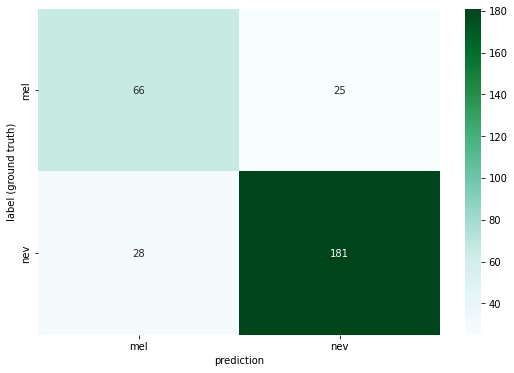

In [112]:
check_perf(best_model, test_loader)

#**To do**
*   F1-Measure
*   Draw graphs
*   Train with segmented images



#Mobile Net!!!

In [ ]:
from pytorchcv import train, display_dataset, train_long, load_cats_dogs_dataset, validate, common_transform

In [ ]:
if not os.path.exists('data/kagglecatsanddogs_5340.zip'):
    !wget -P data -q https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

dataset, train_loader, test_loader = load_cats_dogs_dataset()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [ ]:
next(iter(train_loader))

In [ ]:
model = torch.hub.load(
    'pytorch/vision:v0.6.0',
    'mobilenet_v2',
    pretrained=True
)
model.eval()

In [ ]:
print(model)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
sample_image = dataset[0][0].unsqueeze(0)
res = model(sample_image)
print(res[0].argmax())

tensor(281)


In [ ]:
# freeze params
for x in model.parameters():
    x.requires_grad = False

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.classifier = nn.Linear(1280, 2)
model = model.to(device)
summary(
    model,
    input_size=(1, 3, 244, 244)
)

Layer (type:depth-idx)                             Output Shape              Param #
MobileNetV2                                        [1, 2]                    --
├─Sequential: 1-1                                  [1, 1280, 8, 8]           --
│    └─Conv2dNormActivation: 2-1                   [1, 32, 122, 122]         --
│    │    └─Conv2d: 3-1                            [1, 32, 122, 122]         (864)
│    │    └─BatchNorm2d: 3-2                       [1, 32, 122, 122]         (64)
│    │    └─ReLU6: 3-3                             [1, 32, 122, 122]         --
│    └─InvertedResidual: 2-2                       [1, 16, 122, 122]         --
│    │    └─Sequential: 3-4                        [1, 16, 122, 122]         (896)
│    └─InvertedResidual: 2-3                       [1, 24, 61, 61]           --
│    │    └─Sequential: 3-5                        [1, 24, 61, 61]           (5,136)
│    └─InvertedResidual: 2-4                       [1, 24, 61, 61]           --
│    │    └─Sequential

In [ ]:
train_long(
    model,
    train_loader,
    test_loader,
    loss_fn=torch.nn.CrossEntropyLoss(),
    epochs=1,
    print_freq=90
)

Epoch 0, minibatch 0: train acc = 0.4375, train loss = 0.024161575362086296
Epoch 0, minibatch 90: train acc = 0.9237637362637363, train loss = 0.007432236776247129
Epoch 0, minibatch 180: train acc = 0.93646408839779, train loss = 0.00614617015775396
Epoch 0, minibatch 270: train acc = 0.9447647601476015, train loss = 0.005352903116233235


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Epoch 0, minibatch 360: train acc = 0.9454639889196675, train loss = 0.005583338460103297
Epoch 0, minibatch 450: train acc = 0.9470620842572062, train loss = 0.005643820286854407
Epoch 0, minibatch 540: train acc = 0.9463378003696857, train loss = 0.006204796366242076
Epoch 0 done, validation acc = 0.9708, validation loss = 0.003989895248413086
